# Data Mining Experiment 1

## Preprocessing forest.csv

### Import necessary modules

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [5]:
df = pd.read_csv('forestfires.csv')

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [10]:
q = df['FFMC'].quantile(0.99)
df[df['FFMC'] > q] 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
495,6,6,aug,mon,96.2,175.5,661.8,16.8,23.9,42,2.2,0.0,0.00
496,4,5,aug,mon,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,2.77


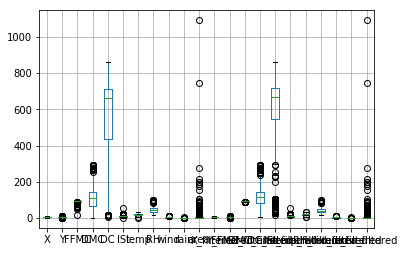

In [14]:
# Computing IQR
Q1 = df['FFMC'].quantile(0.25)
Q3 = df['FFMC'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df.query('(@Q1 - 1.5 * @IQR) <= FFMC <= (@Q3 + 1.5 * @IQR)')
# Ploting the result to check the difference
df.join(filtered, rsuffix='_filtered').boxplot()